In [1]:
import nltk, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from scipy import stats
from gensim import parsing

sns.set_context('talk')

In [2]:
#Instantiate DataFrame of wrangled data
df = pd.read_csv('..\\data\\full_features.csv')
df.BODY[5:10]

5    PROPERTY INFO ID: 9826244Rent: 2450 / MonthBed...
6    Lovely, large one bedroom apartment in an attr...
7    Privately situated, ocean view cottage steps a...
8    PROPERTY INFO ID: 71165240Rent: 2723 / MonthBe...
9    EDGARTOWN VILLAGE - Condominium living! A deli...
Name: BODY, dtype: object

#### Now, the 'BODY' feature will be vectorized.

In [3]:
#The gensim.parsing.preprocess_documents() function tokenizes and stems a pandas Series
preprocessed_text = parsing.preprocess_documents(df.BODY)

In [4]:
df['BODY_PREPROCESSED'] = [' '.join(word) for word in preprocessed_text]
df.BODY_PREPROCESSED.head()

0    properti info rent monthb bath avail date pet ...
1    properti info rent monthb bath avail date nowp...
2    properti info rent monthb bath avail date pet ...
3    properti info rent monthb bath avail date pet ...
4    properti info rent monthb bath avail date nowp...
Name: BODY_PREPROCESSED, dtype: object

In [9]:
# Possible Future PreProcessing: Remove HTML/XML tags, Replace accented characters, Correct Spelling Errors

In [5]:
bow_vectorizer = CountVectorizer(stop_words = 'english')
bow_matrix = bow_vectorizer.fit_transform(df.BODY)
bow_matrix.shape

(126358, 70291)

In [6]:
word_count = pd.DataFrame(bow_matrix.sum(axis = 0).T)
word_count.index = bow_vectorizer.get_feature_names()
word_count.columns = ['Count']
word_count.sort_values(by = 'Count', inplace = True, ascending = False)

<function matplotlib.pyplot.show(close=None, block=None)>

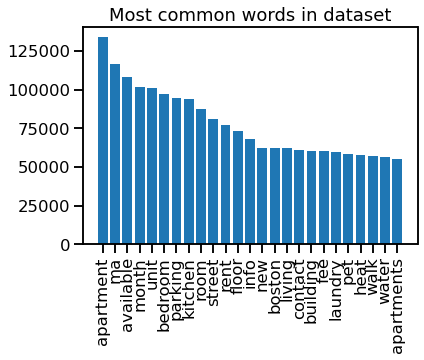

In [7]:
plt.bar(word_count[:25].index, word_count[:25].Count)
plt.xticks(rotation = 90)
plt.title('Most common words in dataset')
plt.show

#### The most common words are as expected for a set of real estate listings in Massachusetts.

#### A more complex vectorization such as tf-idf can prevent these words from dominating models and similarity measures.

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2, max_df = 0.7)
tfidf_matrix = tfidf_vectorizer.fit_transform(df.BODY)
tfidf_matrix.shape

(126358, 37899)

#### The 'BODY' column is now vectorized and ready to be processed by statistical models